In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import sqlite3
import geopandas as gpd
import geobr
import matplotlib.pyplot as plt
import libpysal
from libpysal.weights.contiguity import Queen
import esda
from splot.esda import moran_scatterplot
from splot.esda import lisa_cluster

In [2]:
#Leitura dos indicadores por região imediata
cnx = sqlite3.connect("indicadores.db")
cur = cnx.cursor()
regimed_df = pd.read_sql_query("SELECT * FROM imedreg_df", cnx)
regimed_df.head()

,imediate_reg,imed_reg_code,epidemiological_week,week_last_day,state,region,city_ibge_code,total_inhabitants,last_available_confirmed,last_available_deaths,new_week_cases,new_week_deaths,prevalence,mortality,lethality,incidence_cases,incidence_deaths,cases_growth_factor,deaths_growth_factor
0,Abaetetuba,150003,9,2020-02-29,PA,norte,6016072,439624.04368,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Abaetetuba,150003,10,2020-03-07,PA,norte,6016072,439624.04368,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Abaetetuba,150003,11,2020-03-14,PA,norte,6016072,439624.04368,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Abaetetuba,150003,12,2020-03-21,PA,norte,6016072,439624.04368,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Abaetetuba,150003,13,2020-03-28,PA,norte,6016072,439624.04368,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
#Leitura da geometrias das regiões e merge com os indicadores
ri_geo = geobr.read_immediate_region()
ri_geo = ri_geo.rename(columns={'code_immediate':'imed_reg_code'})
ri_geo['imed_reg_code'] = ri_geo['imed_reg_code'].astype(int)
ri_geo = ri_geo.merge(regimed_df, on = 'imed_reg_code')
ri_geo.head()

,imed_reg_code,name_immediate,code_state,abbrev_state,name_state,code_region,name_region,geometry,imediate_reg,epidemiological_week,...,last_available_deaths,new_week_cases,new_week_deaths,prevalence,mortality,lethality,incidence_cases,incidence_deaths,cases_growth_factor,deaths_growth_factor
0,110001,Porto Velho,11,RO,Rondônia,1,Norte,"MULTIPOLYGON (((-63.32721 -7.97672, -62.86662 ...",Porto Velho,9,...,0,0,0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
1,110001,Porto Velho,11,RO,Rondônia,1,Norte,"MULTIPOLYGON (((-63.32721 -7.97672, -62.86662 ...",Porto Velho,10,...,0,0,0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
2,110001,Porto Velho,11,RO,Rondônia,1,Norte,"MULTIPOLYGON (((-63.32721 -7.97672, -62.86662 ...",Porto Velho,11,...,0,0,0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
3,110001,Porto Velho,11,RO,Rondônia,1,Norte,"MULTIPOLYGON (((-63.32721 -7.97672, -62.86662 ...",Porto Velho,12,...,0,2,0,0.303159,0.0,0.0,0.303159,0.0,0.0,0.0
4,110001,Porto Velho,11,RO,Rondônia,1,Norte,"MULTIPOLYGON (((-63.32721 -7.97672, -62.86662 ...",Porto Velho,13,...,0,3,0,0.757897,0.0,0.0,0.454738,0.0,1.5,0.0


In [4]:
#Alterar aqui para mudar a semana analisada
sem = ri_geo[ri_geo['epidemiological_week'] == 36]
str_sem = '36'
sem.head()

,imed_reg_code,name_immediate,code_state,abbrev_state,name_state,code_region,name_region,geometry,imediate_reg,epidemiological_week,...,last_available_deaths,new_week_cases,new_week_deaths,prevalence,mortality,lethality,incidence_cases,incidence_deaths,cases_growth_factor,deaths_growth_factor
27,110001,Porto Velho,11,RO,Rondônia,1,Norte,"MULTIPOLYGON (((-63.32721 -7.97672, -62.86662 ...",Porto Velho,36,...,774,1199,16,4993.483042,117.322523,2.349513,181.743805,2.425272,1.046248,0.666667
57,110002,Ariquemes,11,RO,Rondônia,1,Norte,"MULTIPOLYGON (((-62.48851 -8.73008, -62.48411 ...",Ariquemes,36,...,109,512,7,2655.689847,44.623122,1.680284,209.605858,2.865705,0.996109,0.500000
87,110003,Jaru,11,RO,Rondônia,1,Norte,"MULTIPOLYGON (((-62.22055 -8.59088, -62.21053 ...",Jaru,36,...,33,245,4,2431.892292,27.371230,1.125512,203.210645,3.317725,0.983936,4.000000
117,110004,Ji-Paraná,11,RO,Rondônia,1,Norte,"MULTIPOLYGON (((-61.57450 -9.72063, -61.57157 ...",Ji-Paraná,36,...,115,467,16,1816.293953,37.825752,2.082579,153.605447,5.262713,0.791525,1.777778
147,110005,Cacoal,11,RO,Rondônia,1,Norte,"MULTIPOLYGON (((-61.42731 -10.98755, -61.00059...",Cacoal,36,...,83,474,7,1874.484641,27.429870,1.463329,156.647694,2.313363,0.975309,0.875000


C:\Users\vicda\Anaconda3\envs\geo_env\lib\site-packages\libpysal\weights\weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 7 disconnected components.
 There are 4 islands with ids: 24, 30, 133, 169.
  warnings.warn(message)


('WARNING: ', 24, ' is an island (no neighbors)')
('WARNING: ', 30, ' is an island (no neighbors)')
('WARNING: ', 133, ' is an island (no neighbors)')
('WARNING: ', 169, ' is an island (no neighbors)')


C:\Users\vicda\Anaconda3\envs\geo_env\lib\site-packages\splot\_viz_libpysal_mpl.py:115: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroids_shp = gdf.centroid.values
C:\Users\vicda\Anaconda3\envs\geo_env\lib\site-packages\splot\_viz_libpysal_mpl.py:154: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf.centroid.plot(ax=ax, **node_kws)


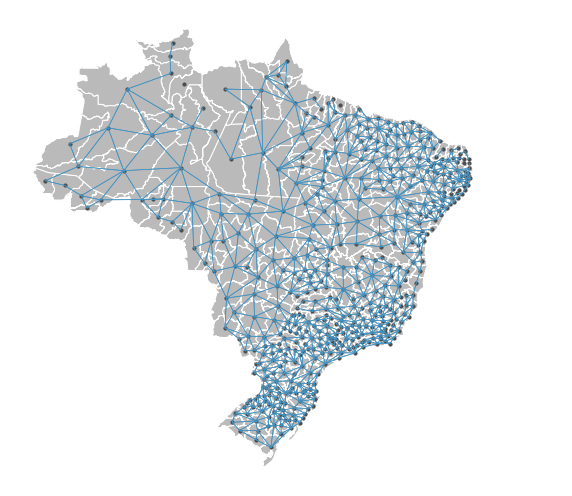

In [5]:
#Cálculo do peso entre regiões
from splot.libpysal import plot_spatial_weights

weights = Queen.from_dataframe(sem)
weights.transform = 'r'
plot_spatial_weights(weights, sem)
plt.show()

C:\Users\vicda\Anaconda3\envs\geo_env\lib\site-packages\libpysal\weights\weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 2 disconnected components.
  warnings.warn(message)
C:\Users\vicda\Anaconda3\envs\geo_env\lib\site-packages\splot\_viz_libpysal_mpl.py:115: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroids_shp = gdf.centroid.values
C:\Users\vicda\Anaconda3\envs\geo_env\lib\site-packages\splot\_viz_libpysal_mpl.py:154: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf.centroid.plot(ax=ax, **node_kws)


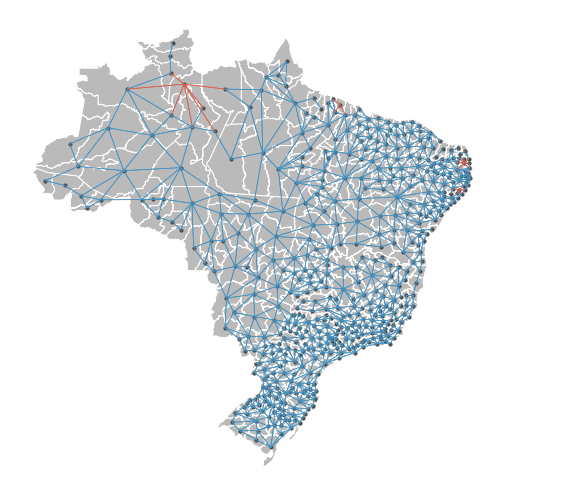

In [6]:
#Consertando os erros causados pela digitalização
wnp = libpysal.weights.util.nonplanar_neighbors(weights, sem)
wnp.transform = 'r'
plot_spatial_weights(wnp, sem)
plt.show()

In [7]:
#Moran Local e Moran I para cada indicador a seguir
spatial_auto = esda.Moran_Local(sem['new_week_cases'], wnp)
moran = esda.Moran(sem['new_week_cases'], wnp)
moran.I

0.13677791433631678

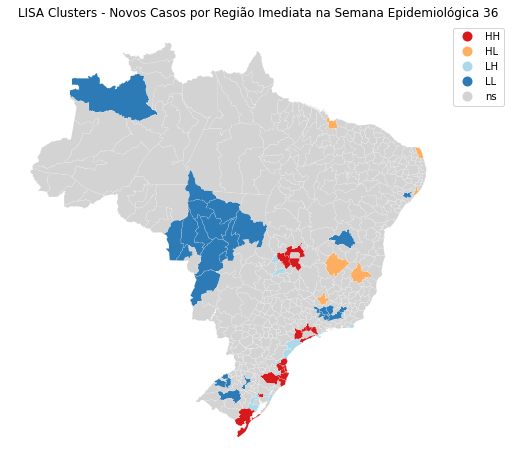

In [8]:
#Plot dos clusters
lisa_cluster(spatial_auto, sem, p=0.05, figsize = (9,9))
plt.title('LISA Clusters - Novos Casos por Região Imediata na Semana Epidemiológica ' + str_sem)
plt.show()

In [9]:
spatial_auto = esda.Moran_Local(sem['new_week_deaths'], wnp)
moran = esda.Moran(sem['new_week_deaths'], wnp)
moran.I

0.05997349694726711

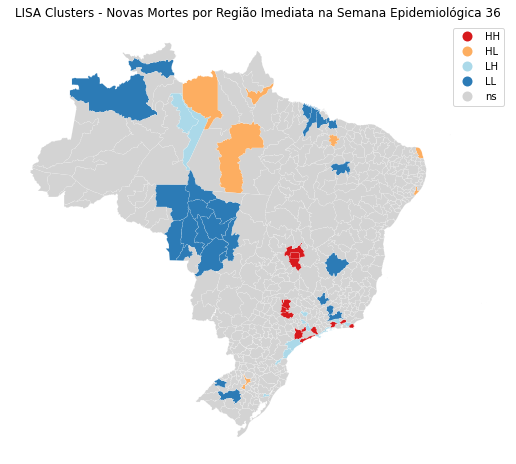

In [10]:
lisa_cluster(spatial_auto, sem, p=0.05, figsize = (9,9))

plt.title('LISA Clusters - Novas Mortes por Região Imediata na Semana Epidemiológica ' + str_sem)
plt.show()

In [11]:
spatial_auto = esda.Moran_Local(sem['prevalence'], wnp)
moran = esda.Moran(sem['prevalence'], wnp)
moran.I

0.5952577417824692

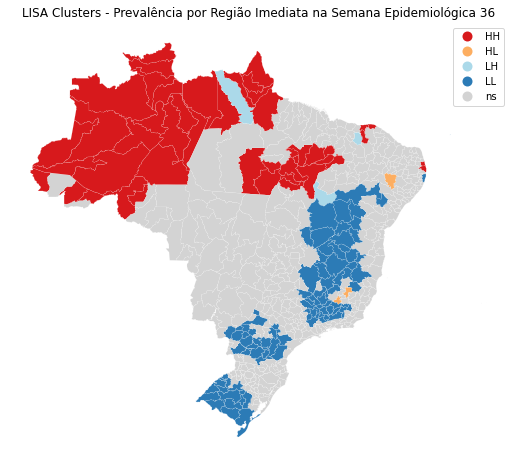

In [12]:
lisa_cluster(spatial_auto, sem, p=0.05, figsize = (9,9))

plt.title('LISA Clusters - Prevalência por Região Imediata na Semana Epidemiológica ' + str_sem)
plt.show()

In [13]:
spatial_auto = esda.Moran_Local(sem['mortality'], wnp)
moran = esda.Moran(sem['mortality'], wnp)
moran.I

0.5223542888183571

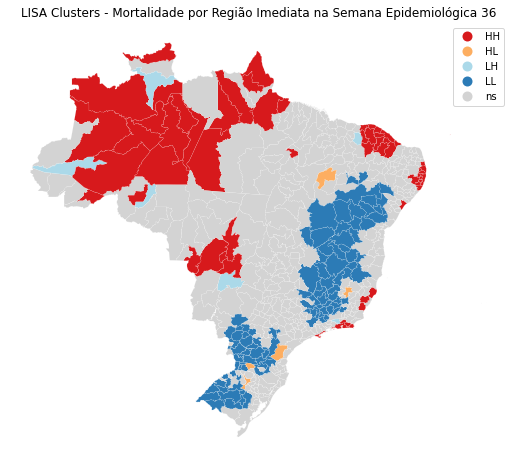

In [14]:
lisa_cluster(spatial_auto, sem, p=0.05, figsize = (9,9))

plt.title('LISA Clusters - Mortalidade por Região Imediata na Semana Epidemiológica ' + str_sem)
plt.show()

In [15]:
spatial_auto = esda.Moran_Local(sem['lethality'], wnp)
moran = esda.Moran(sem['lethality'], wnp)
moran.I

0.44316480388718194

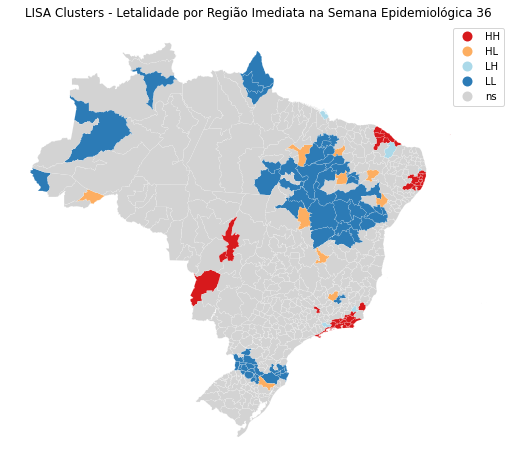

In [16]:
lisa_cluster(spatial_auto, sem, p=0.05, figsize = (9,9))

plt.title('LISA Clusters - Letalidade por Região Imediata na Semana Epidemiológica ' + str_sem)
plt.show()

In [17]:
spatial_auto = esda.Moran_Local(sem['incidence_cases'], wnp)
moran = esda.Moran(sem['incidence_cases'], wnp)
moran.I

0.5055185643359692

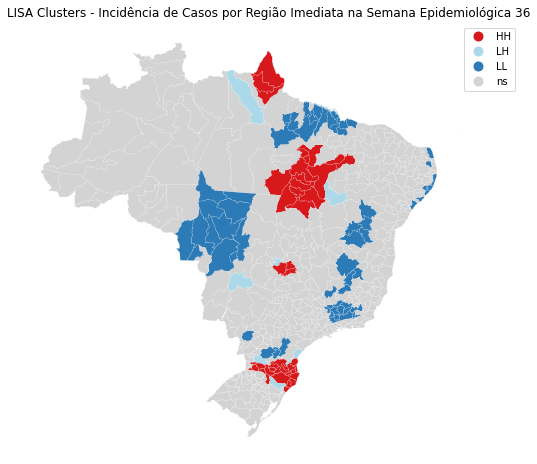

In [18]:
lisa_cluster(spatial_auto, sem, p=0.05, figsize = (9,9))

plt.title('LISA Clusters - Incidência de Casos por Região Imediata na Semana Epidemiológica ' + str_sem)
plt.show()

In [19]:
spatial_auto = esda.Moran_Local(sem['incidence_deaths'], wnp)
moran = esda.Moran(sem['incidence_deaths'], wnp)
moran.I

0.24486192066394144

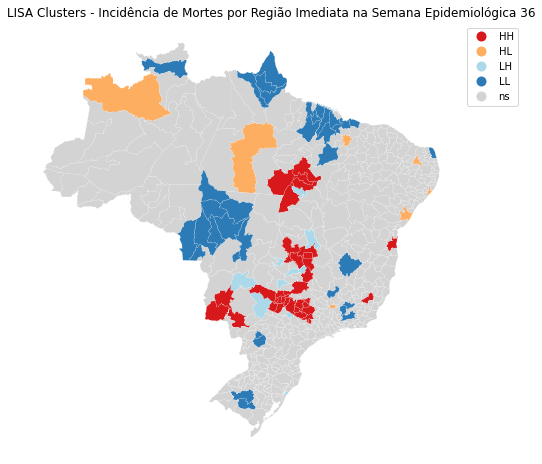

In [20]:
lisa_cluster(spatial_auto, sem, p=0.05, figsize = (9,9))

plt.title('LISA Clusters - Incidência de Mortes por Região Imediata na Semana Epidemiológica ' + str_sem)
plt.show()

In [21]:
spatial_auto = esda.Moran_Local(sem['cases_growth_factor'], wnp)
moran = esda.Moran(sem['cases_growth_factor'], wnp)
moran.I

0.38989088064823085

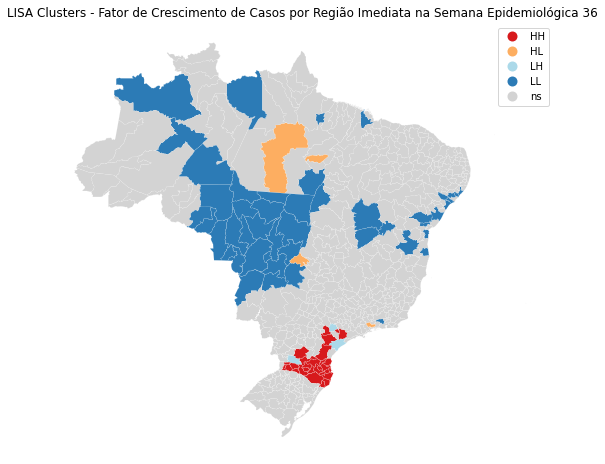

In [22]:
lisa_cluster(spatial_auto, sem, p=0.05, figsize = (9,9))

plt.title('LISA Clusters - Fator de Crescimento de Casos por Região Imediata na Semana Epidemiológica ' + str_sem)
plt.show()

In [23]:
spatial_auto = esda.Moran_Local(sem['deaths_growth_factor'], wnp)
moran = esda.Moran(sem['deaths_growth_factor'], wnp)
moran.I

0.03411261914378798

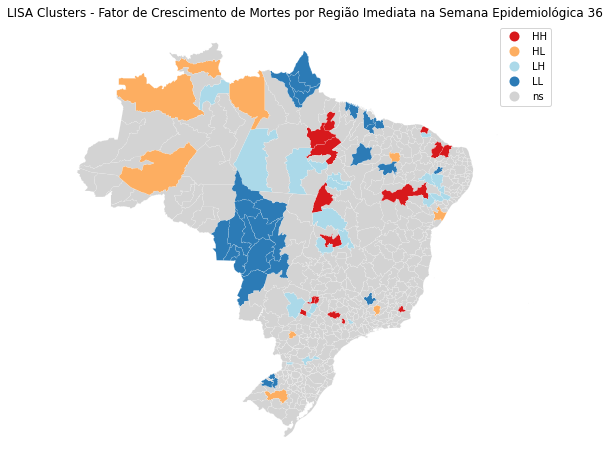

In [24]:
lisa_cluster(spatial_auto, sem, p=0.05, figsize = (9,9))

plt.title('LISA Clusters - Fator de Crescimento de Mortes por Região Imediata na Semana Epidemiológica ' + str_sem)
plt.show()